## Criação de modelo para detecção de fraudes em cartão de crédito

Para saber mais sobre este notebook, acesse: 

https://medium.com/renato-dantas/detec%C3%A7%C3%A3o-de-fraudes-em-cart%C3%A3o-de-cr%C3%A9dito-2ff0041cf553

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = 'creditcard.csv'
df = pd.read_csv(file)

In [3]:
df.head().T

,0,1,2,3,4
Time,0.000000,0.000000,1.000000,1.000000,2.000000
V1,-1.359807,1.191857,-1.358354,-0.966272,-1.158233
V2,-0.072781,0.266151,-1.340163,-0.185226,0.877737
V3,2.536347,0.166480,1.773209,1.792993,1.548718
V4,1.378155,0.448154,0.379780,-0.863291,0.403034
V5,-0.338321,0.060018,-0.503198,-0.010309,-0.407193
V6,0.462388,-0.082361,1.800499,1.247203,0.095921
V7,0.239599,-0.078803,0.791461,0.237609,0.592941
V8,0.098698,0.085102,0.247676,0.377436,-0.270533
V9,0.363787,-0.255425,-1.514654,-1.387024,0.817739


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [6]:
df.shape

(284807, 31)

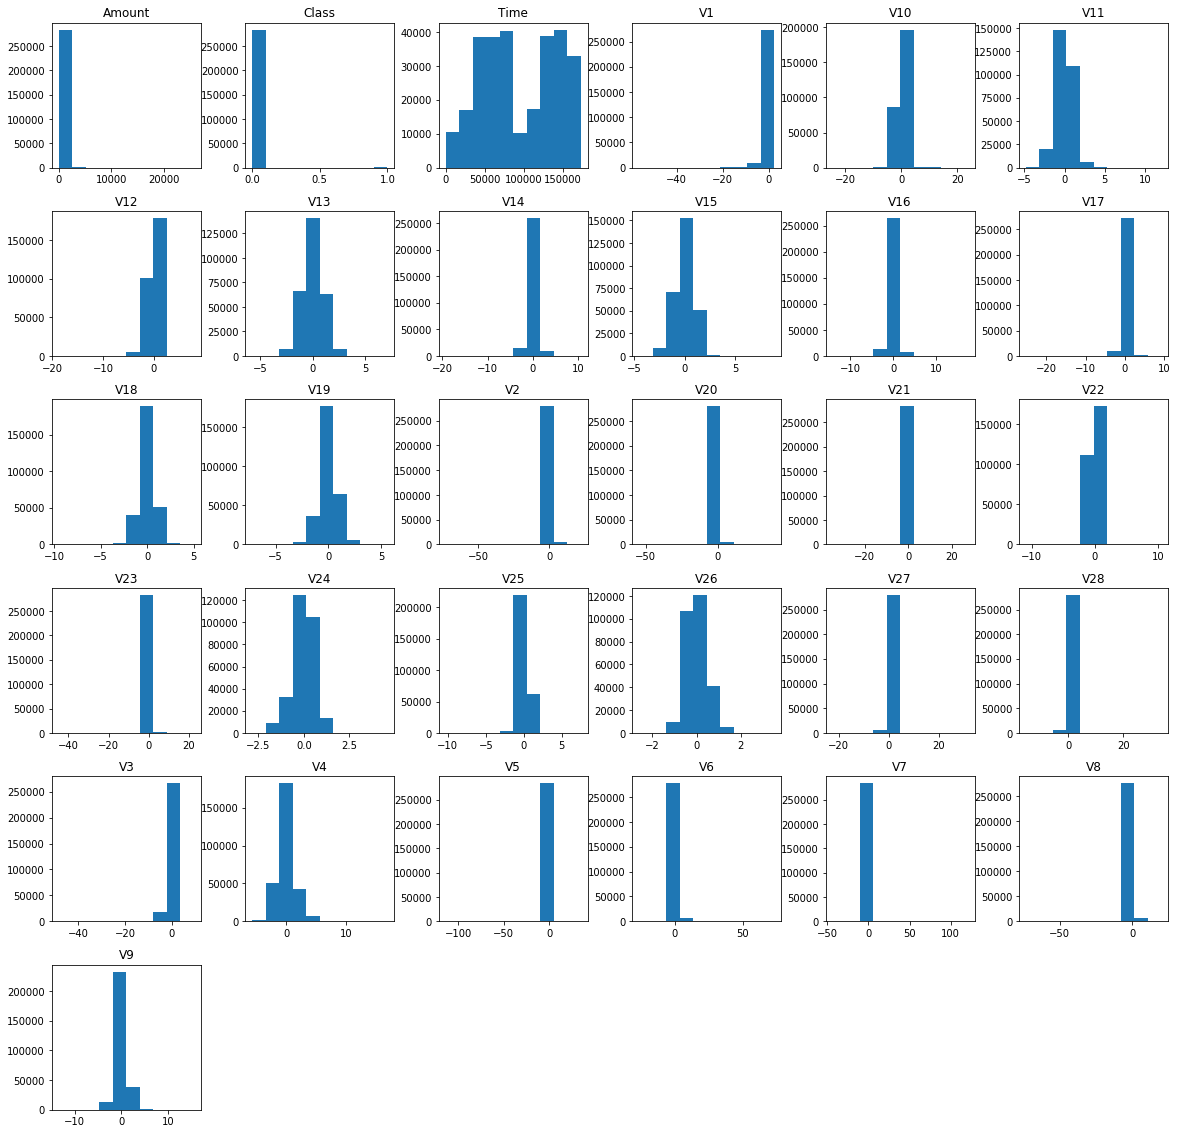

In [17]:
# Visualizando a distribuição dos dados
df.hist(figsize = (20,20), grid = False)
plt.show()

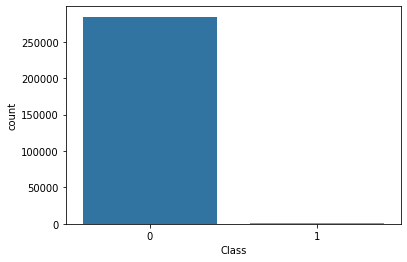

In [18]:
#Contando o números de exemplos por cada classe
sns.countplot(x = 'Class', data = df)

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
# Separando os dados
X = df.drop('Class', axis = 1)
y = df.Class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3)

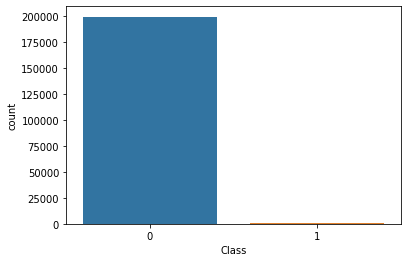

In [6]:
# Visualizando o número de exemplos por classe dentro da variável de treino
sns.countplot(x = y_train)

In [7]:
from imblearn.over_sampling import SMOTE

In [8]:
# Aplicando o SMOTE para criação de dados sintéticos afim de balancear as classes
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)

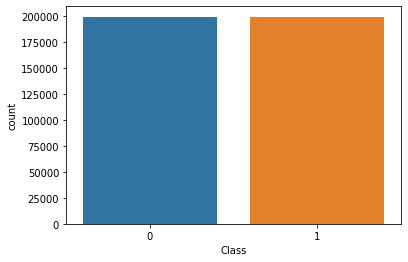

In [9]:
#Visualizando os dados após a aplicação do SMOTE
sns.countplot(y_train)

In [29]:
X_train.shape, y_train.shape

((398032, 30), (398032,))

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
# Treinando um modelo de classificação
model = RandomForestClassifier(n_estimators = 10)
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [34]:
# Fazendo previsões usando os dados de teste
pred = model.predict(X_test)

In [35]:
from sklearn.metrics import classification_report,confusion_matrix, plot_confusion_matrix

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.84      0.83      0.84       144

    accuracy                           1.00     85443
   macro avg       0.92      0.91      0.92     85443
weighted avg       1.00      1.00      1.00     85443



Text(0, 0.5, 'True Label')

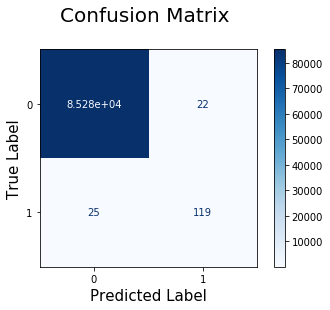

In [37]:
# Visualizando as métricas de acurácia e precisão do modelo
print('Classification Report: \n',classification_report(y_test,pred))
plot_confusion_matrix(model,X_test,y_test, cmap=plt.cm.Blues,values_format= '.4g') #plotting the confusion matrix
plt.title('Confusion Matrix \n',fontsize = 20)
plt.xlabel('Predicted Label',fontsize = 15)
plt.ylabel('True Label', fontsize = 15)

In [44]:
# Processando dados de colunas não previamente escaladas
from sklearn.preprocessing import StandardScaler
data_to_scaler = df[['Amount', 'Time']] 
scaled = StandardScaler()
scaled.fit(data_to_scaler)
df_new = scaled.transform(data_to_scaler)
df_new

array([[ 0.24496426, -1.99658302],
       [-0.34247454, -1.99658302],
       [ 1.16068593, -1.99656197],
       ...,
       [-0.0818393 ,  1.6419735 ],
       [-0.31324853,  1.6419735 ],
       [ 0.51435531,  1.64205773]])

In [43]:
df.Amount = df_new

,Amount,Time
0,149.62,0.0
1,2.69,0.0
2,378.66,1.0
3,123.50,1.0
4,69.99,2.0
...,...,...
284802,0.77,172786.0
284803,24.79,172787.0
284804,67.88,172788.0
284805,10.00,172788.0


In [46]:
columns = pd.DataFrame(df_new, columns = ['Amount','Time'])
columns

,Amount,Time
0,0.244964,-1.996583
1,-0.342475,-1.996583
2,1.160686,-1.996562
3,0.140534,-1.996562
4,-0.073403,-1.996541
...,...,...
284802,-0.350151,1.641931
284803,-0.254117,1.641952
284804,-0.081839,1.641974
284805,-0.313249,1.641974


In [ ]:
#Acrescentando os dados escalos ao dataset original

In [47]:
df.Amount = columns.Amount

In [50]:
df.Time = columns.Time

In [ ]:
# Seguimos a partir daqui o mesmo processo para treinamento e visualização de resultados

In [51]:
X = df.drop('Class', axis = 1)
y = df.Class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3)

In [52]:
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)

In [53]:
model = RandomForestClassifier(n_estimators = 10)
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [54]:
pred = model.predict(X_test)

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85289
           1       0.88      0.84      0.86       154

    accuracy                           1.00     85443
   macro avg       0.94      0.92      0.93     85443
weighted avg       1.00      1.00      1.00     85443



Text(0, 0.5, 'True Label')

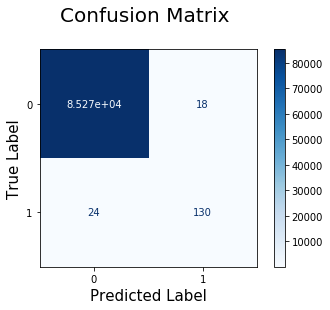

In [55]:
print('Classification Report: \n',classification_report(y_test,pred))
plot_confusion_matrix(model,X_test,y_test, cmap=plt.cm.Blues,values_format= '.4g') #plotting the confusion matrix
plt.title('Confusion Matrix \n',fontsize = 20)
plt.xlabel('Predicted Label',fontsize = 15)
plt.ylabel('True Label', fontsize = 15)